In [1]:
import pysam
import numpy as np
import cPickle as pickle

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from pyUMI import umi_stats as stats
from pyUMI import multimap_solver as sv

In [3]:
import logging
logging.basicConfig(level=logging.INFO)

In [4]:
from pyUMI import repeat_solver as rs

-----------------

In [5]:
st = pysam.AlignmentFile("/data/UMI/data/MUS/sample_AAAACT.bam","rb")

### Mapping statistics

In [21]:
st.reset()
reads = st.fetch(until_eof=True)

chr1 = []
for r in reads:
    if not r.is_unmapped and r.reference_name == 'chr1':
        chr1.append(r.reference_start)

In [26]:
chr1[0]

3015744

In [24]:
st.reset()
reads = st.fetch(until_eof=True)

chr2 = []
for r in reads:
    if not r.is_unmapped and r.reference_name == 'chr2':
        chr2.append(r.reference_start)

In [25]:
chr2[0]

3051933

In [14]:
st.reset()
reads = st.fetch(until_eof=True)

chr5 = []
for r in reads:
    if r.rname == 'chr5':
        chr5.append(r.reference_start)

In [11]:
st.reset()
reads = st.fetch(until_eof=True)

chr8 = []
for r in reads:
    if r.rname == 'chr8':
        chr7.append(r.reference_start)

In [12]:
chr7

[]

INFO:pyUMI.umi_stats:	Total number of reads:	     18,416,881
INFO:pyUMI.umi_stats:	Unmapped reads:		        664,548
INFO:pyUMI.umi_stats:	Uniquely mapped reads:	      3,398,339
INFO:pyUMI.umi_stats:	Multimapped reads:	     14,353,994


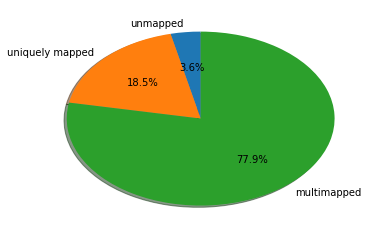

In [6]:
stats.mapping_stats(st, draw_pie=True)

### Repeats statistics

#### All repeats

INFO:pyUMI.repeat_solver:	Total number of bam file reads:               12,589,260
INFO:pyUMI.repeat_solver:	Number of repeats in bam file reads:           4,705,484


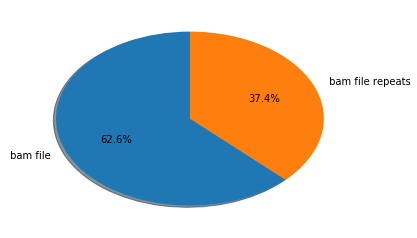

In [7]:
rs.repeat_stats(st, domain='read', report=True, draw_pie=True);

#### Among uniquely mapped reads

INFO:pyUMI.repeat_solver:	Total number of uniquely mapped reads:                3,398,339
INFO:pyUMI.repeat_solver:	Number of repeats in uniquely mapped reads:             194,052


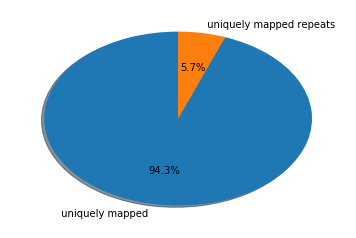

In [8]:
rs.repeat_stats(st, domain='unique', report=True, draw_pie=True);

#### Among multimapped reads

INFO:pyUMI.repeat_solver:	Total number of multimapped reads:               14,353,994
INFO:pyUMI.repeat_solver:	Number of repeats in multimapped reads:           4,511,432


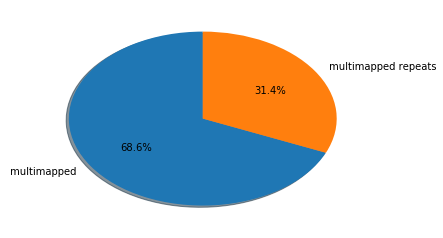

In [9]:
rs.repeat_stats(st, domain='multimap', report=True, draw_pie=True);

### Resolved mutlimapped reads with unique counterparts agreeing on a single gene

In [10]:
%%time
mm_hashtable = sv.build_multimapping_hashtable(st)
uniq_hashtable,uniq_map = sv.build_uniques_associations(st, cell_barcodes=["AAAACT"])

CPU times: user 1min 24s, sys: 1.36 s, total: 1min 25s
Wall time: 1min 25s


In [11]:
%%time
r = sv.multimap_multigene_generator(mm_hashtable,0)
_,savers = sv.rank1_multimap_solver(r, uniq_hashtable, uniq_map, report=True)

INFO:pyUMI.multimap_solver:	Generator for multimapped reads with at least 1 distinct gene annotation(s).
INFO:pyUMI.multimap_solver:	Total number of gene-annotated multimapped reads :         2,123,326
INFO:pyUMI.multimap_solver:	Number of multi_mapped reads assigned to a unique gene :      79,412
INFO:pyUMI.multimap_solver:	Total number of resolved alignments :                        286,577


CPU times: user 32.2 s, sys: 19.9 ms, total: 32.2 s
Wall time: 32.2 s


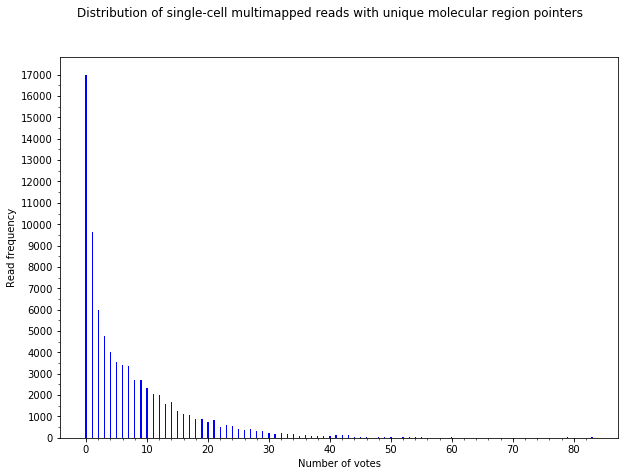

In [12]:
sv.unique_savers_dist(savers,mm_hashtable,uniq_hashtable,draw_bar=True);

In [13]:
a = [k for (j,k) in savers if not "ENSMUS" in k];print "Number of repeats in uniquely mapped savers: %s" %format(len(a),",")

Number of repeats in uniquely mapped savers: 16,801


In [14]:
from collections import Counter;print "Number of distinct repeats in uniquely mapped savers: %s" %format(len(Counter(a)),",")

Number of distinct repeats in uniquely mapped savers: 4,226


INFO:pyUMI.multimap_solver:	Generator for multimapped reads with at least 1 distinct gene annotation(s).


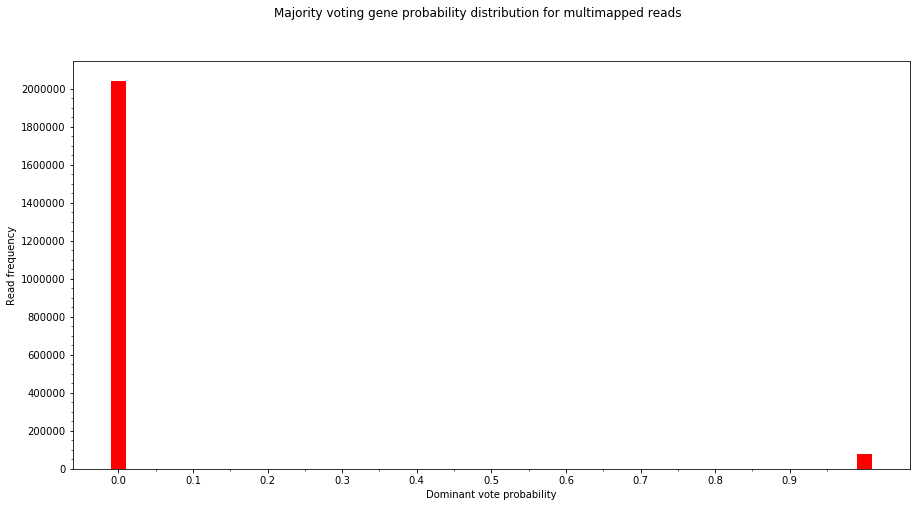

In [15]:
r = sv.multimap_multigene_generator(mm_hashtable,0)
f = sv.majority_fraction_generator(r, uniq_hashtable, uniq_map)
fdist = sv.majority_fraction_report(mf_generator=f,draw_bar=True,color='r',font_size=20);

In [16]:
#AAAGTT  ATATAG  ATCAAA  CCCTGG  CCGGAC  GACCGC  GGCGTC  GTTCGA  TAAAGT  TCTGCA  TTAATC

-----------------------------------------